In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
load_california = fetch_california_housing()

# Feature data
x = load_california.data

# Target variable (house prices)
y = load_california.target

# Create DataFrame with feature names
data = pd.DataFrame(x, columns=load_california.feature_names)

# Add target column as 'SalePrice'
data["SalePrice"] = y

# Show the first few rows
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Print the detailed description of the California housing dataset
# This includes info about the dataset's features, number of samples,
# target variable, and other relevant metadata.
print(load_california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [ ]:
# Print the shape of the DataFrame 'data'
# This shows the number of rows and columns in the dataset
print(data.shape)

(20640, 9)


In [ ]:
# Display summary information about the DataFrame 'data'
# Includes the number of non-null values, data types of each column,
# and memory usage of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
# Generate and display descriptive statistics of the DataFrame 'data'
# This includes count, mean, std (standard deviation), min, max,
# and quartile values for each numerical column
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# Check for missing values in each column of the DataFrame 'data'
# Returns the count of null (missing) entries per column
data.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
SalePrice,0


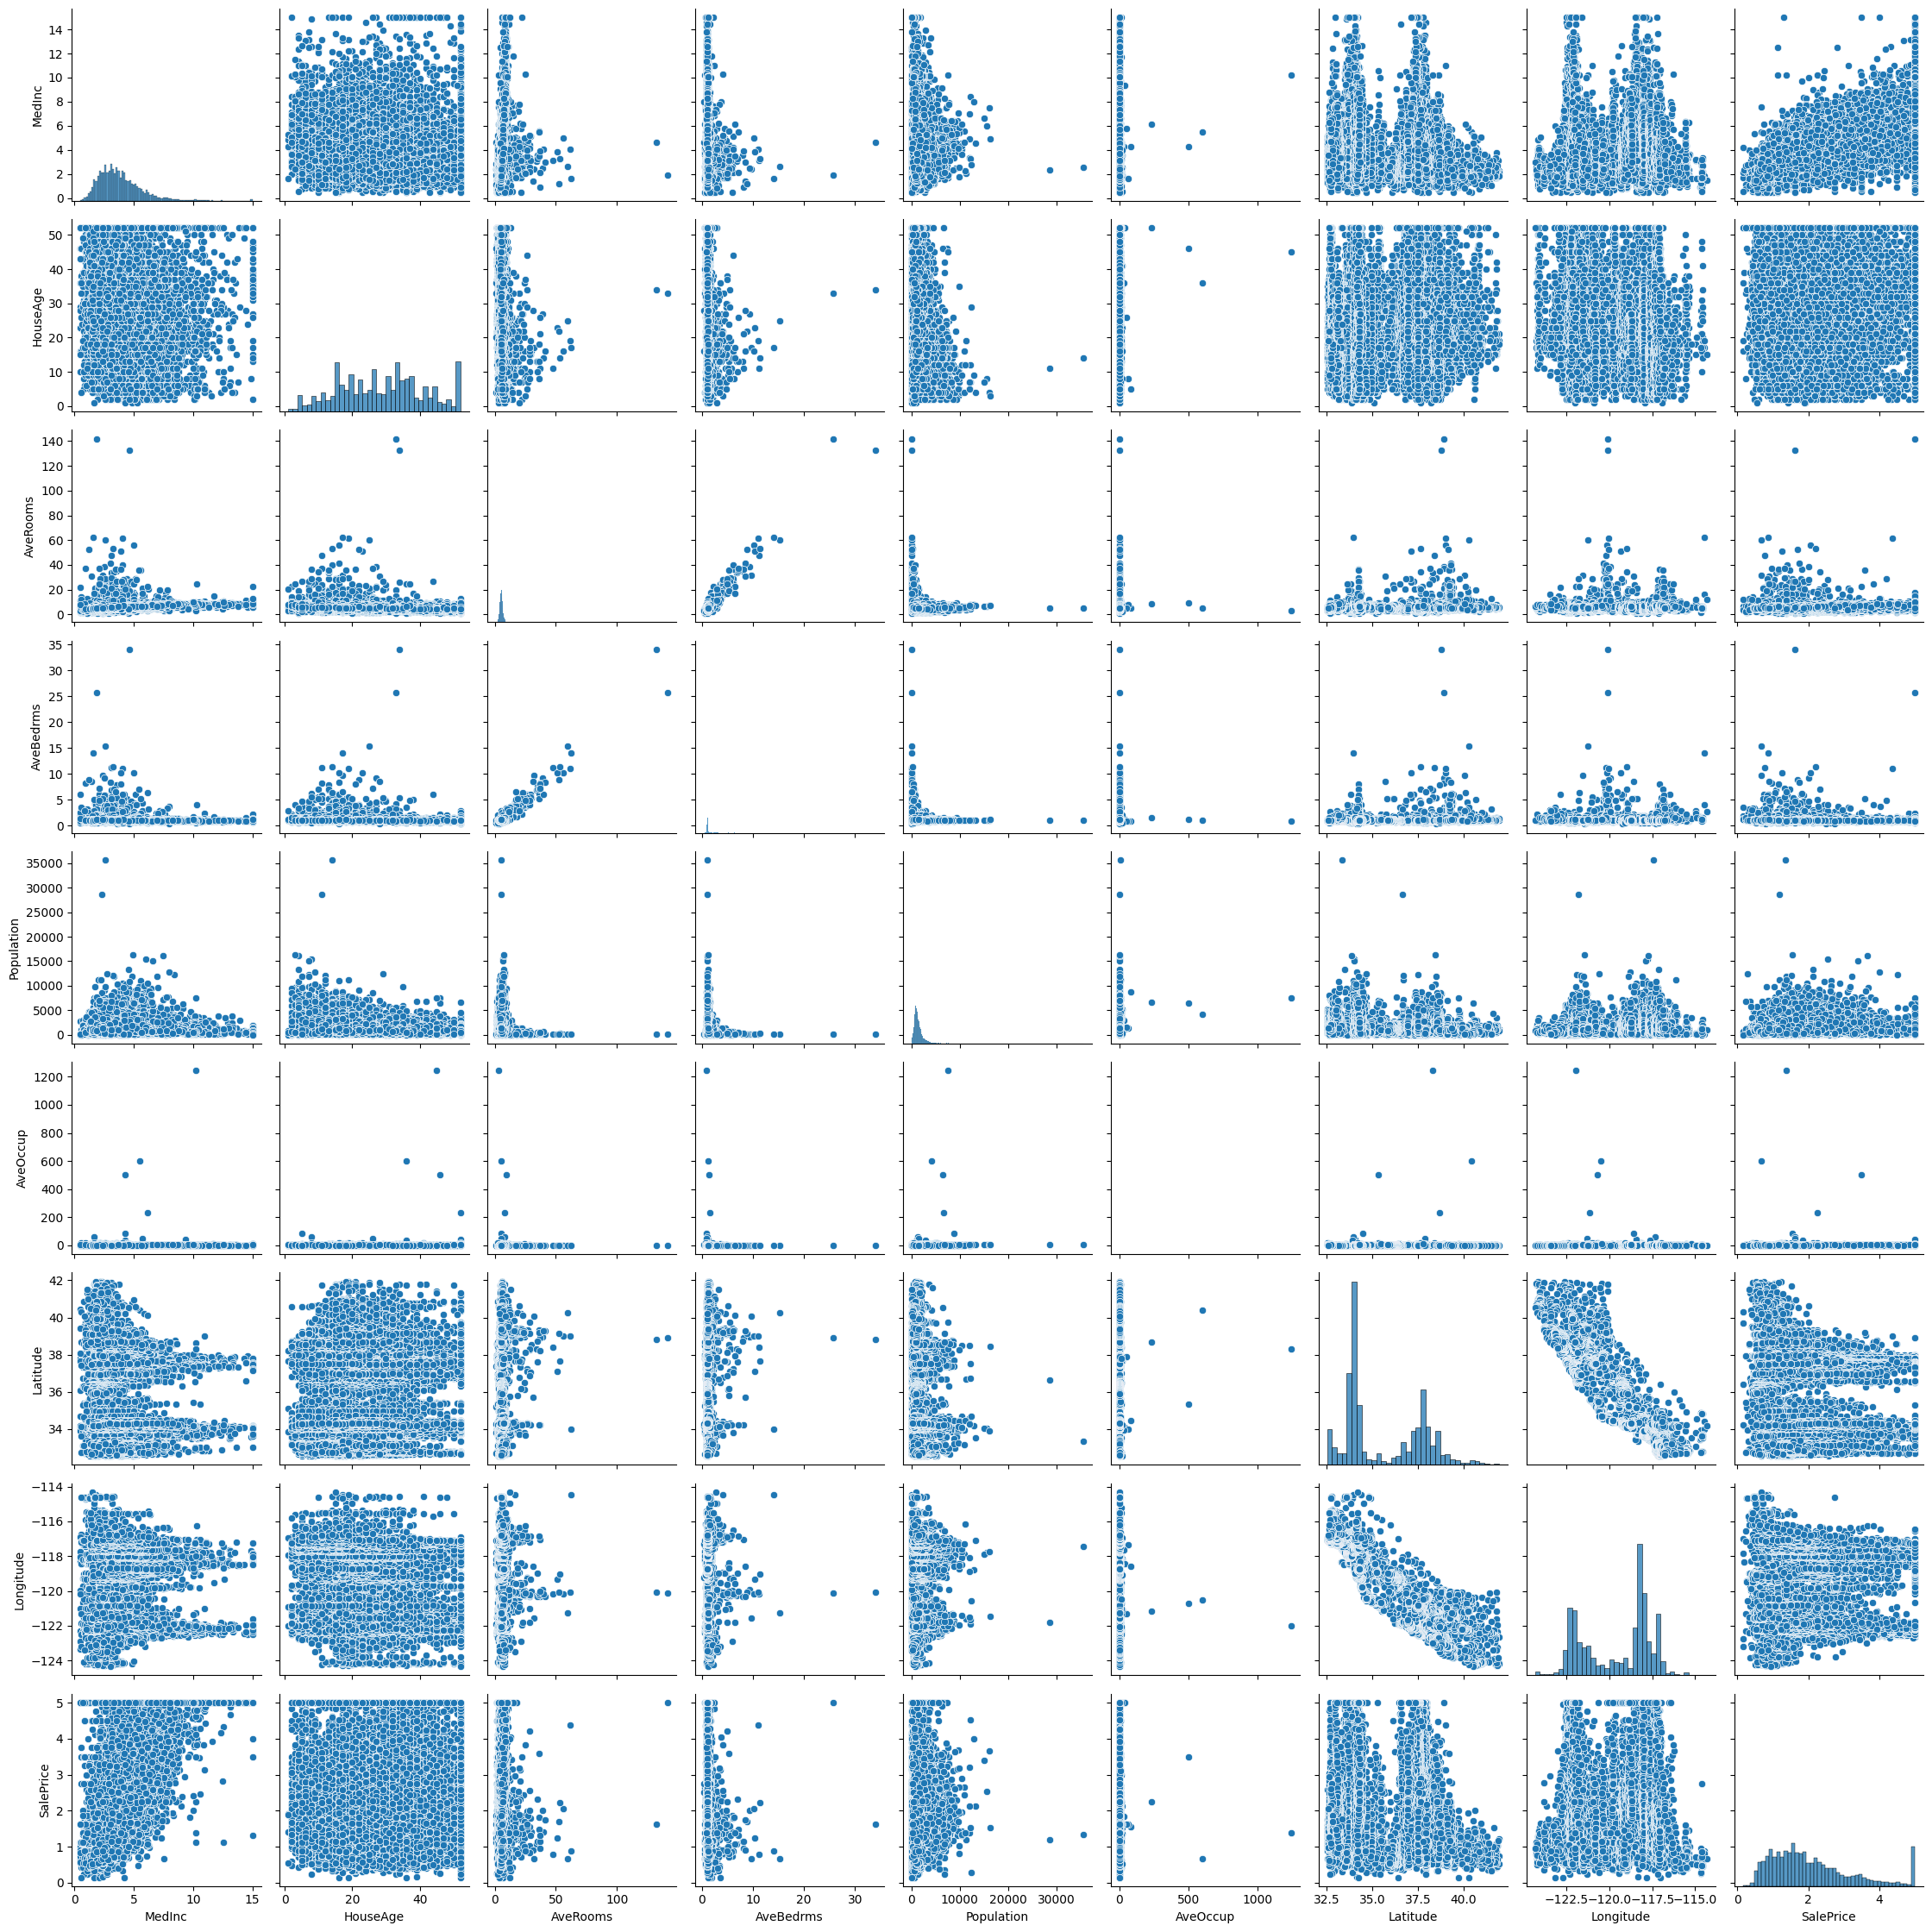

In [ ]:
# Create pairwise scatter plots and histograms for all features in 'data'
# Helps to visualize relationships and distributions between variables
sns.pairplot(data, height=2.5)

# Adjust subplot parameters to give some padding and prevent overlap
plt.tight_layout()

In [ ]:
# Calculate and print the skewness of the 'SalePrice' distribution
# Skewness measures the asymmetry of the distribution
print("Skewness: %f" % data['SalePrice'].skew())

# Calculate and print the kurtosis of the 'SalePrice' distribution
# Kurtosis measures the "tailedness" or extremity of outliers in the distribution
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 0.977763
Kurtosis: 0.327870


<ipython-input-75-598cae7a69e0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["SalePrice"]);


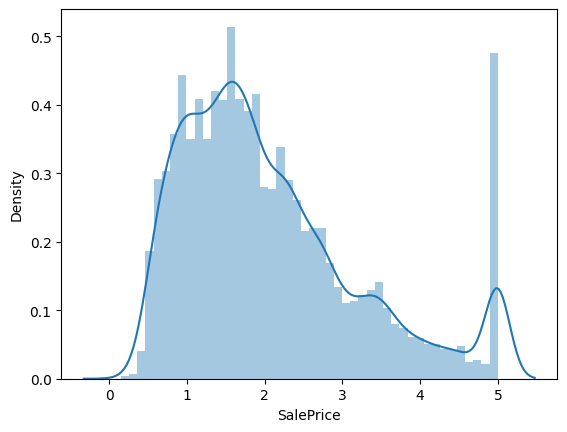

In [ ]:
# Plot the distribution (histogram + KDE) of the 'SalePrice' column
# Helps visualize the frequency and shape of house price values
sns.distplot(data["SalePrice"]);

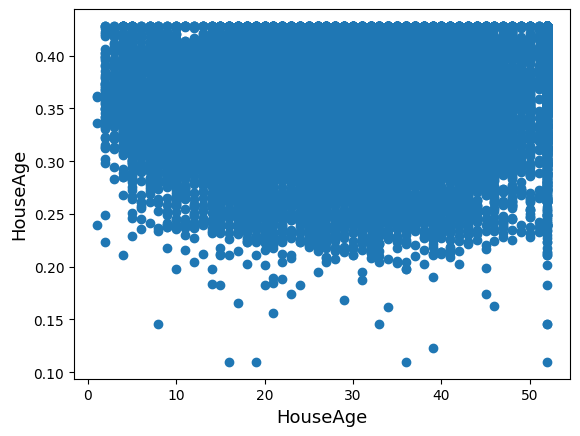

In [ ]:
# Create a figure and a set of subplots (in this case, just one plot)
fig, ax = plt.subplots()

# Plot a scatter plot with 'HouseAge' on the x-axis and 'SalePrice' on the y-axis
ax.scatter(x=data['HouseAge'], y=data['SalePrice'])

# Label the y-axis as 'Population' with font size 13
plt.ylabel('HouseAge', fontsize=13)

# Label the x-axis as 'AveBedrms' with font size 13
plt.xlabel('HouseAge', fontsize=13)

# Display the plot
plt.show()

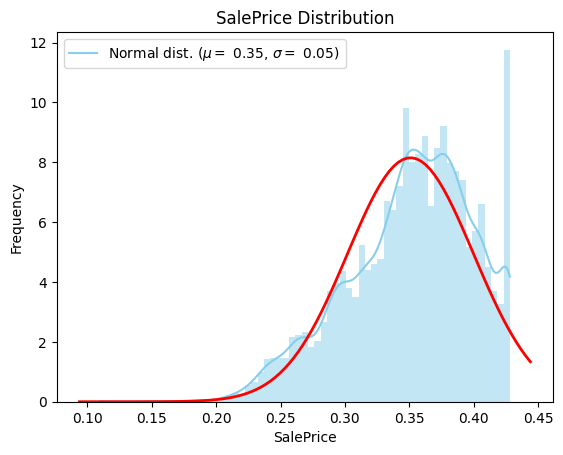

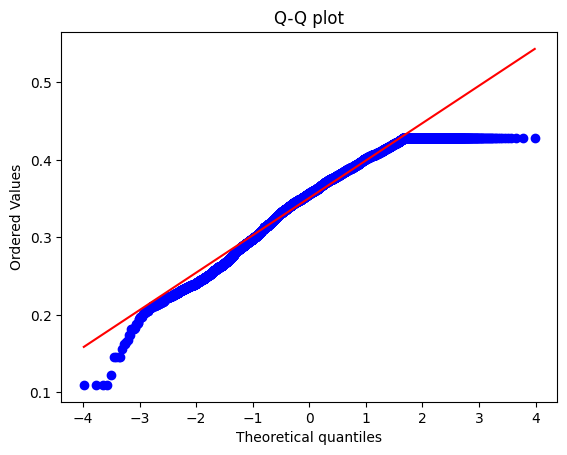

In [ ]:
from scipy import stats
from scipy.stats import norm

import seaborn as sns
import matplotlib.pyplot as plt

# Fit a normal distribution to the SalePrice data
(mu, sigma) = norm.fit(data['SalePrice'])

# Plot the distribution using histplot (distplot is deprecated)
sns.histplot(data['SalePrice'], kde=True, stat="density", linewidth=0, color='skyblue')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)

# Add legend and labels
plt.legend(['Normal dist. ($\mu=$ {:.2f}, $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

# Q-Q plot to further check normality
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.title('Q-Q plot')
plt.show()


μ = 0.30, σ = 0.04



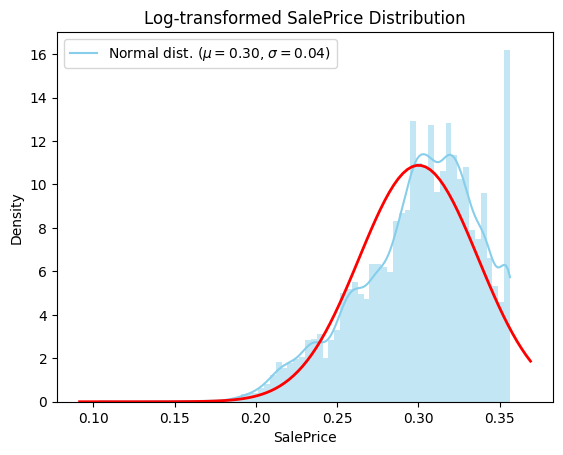

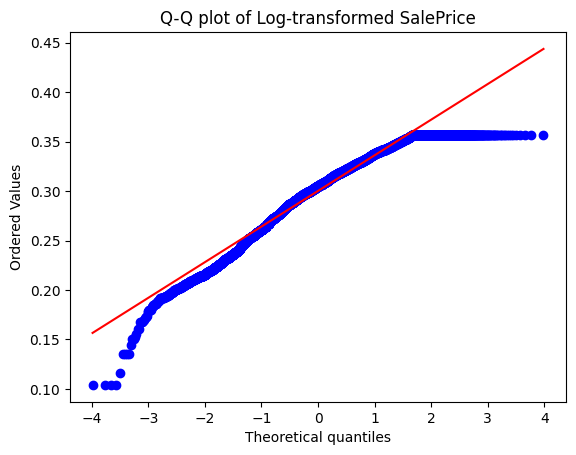

In [ ]:
# Apply log1p transformation to make the SalePrice distribution more normal
data["SalePrice"] = np.log1p(data["SalePrice"])

# Fit a normal distribution to the transformed SalePrice data
mu, sigma = norm.fit(data['SalePrice'])

# Plot the histogram of transformed SalePrice with KDE (Kernel Density Estimation)
sns.histplot(data['SalePrice'], kde=True, stat='density', color='skyblue', linewidth=0)

# Plot the normal distribution curve over the histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'r', linewidth=2)

# Display mu and sigma values
print('\nμ = {:.2f}, σ = {:.2f}\n'.format(mu, sigma))

# Add legend and labels
plt.legend(['Normal dist. ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Density')
plt.title('Log-transformed SalePrice Distribution')

# Show the plot
plt.show()

# Create Q-Q plot to assess normality
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.title('Q-Q plot of Log-transformed SalePrice')
plt.show()


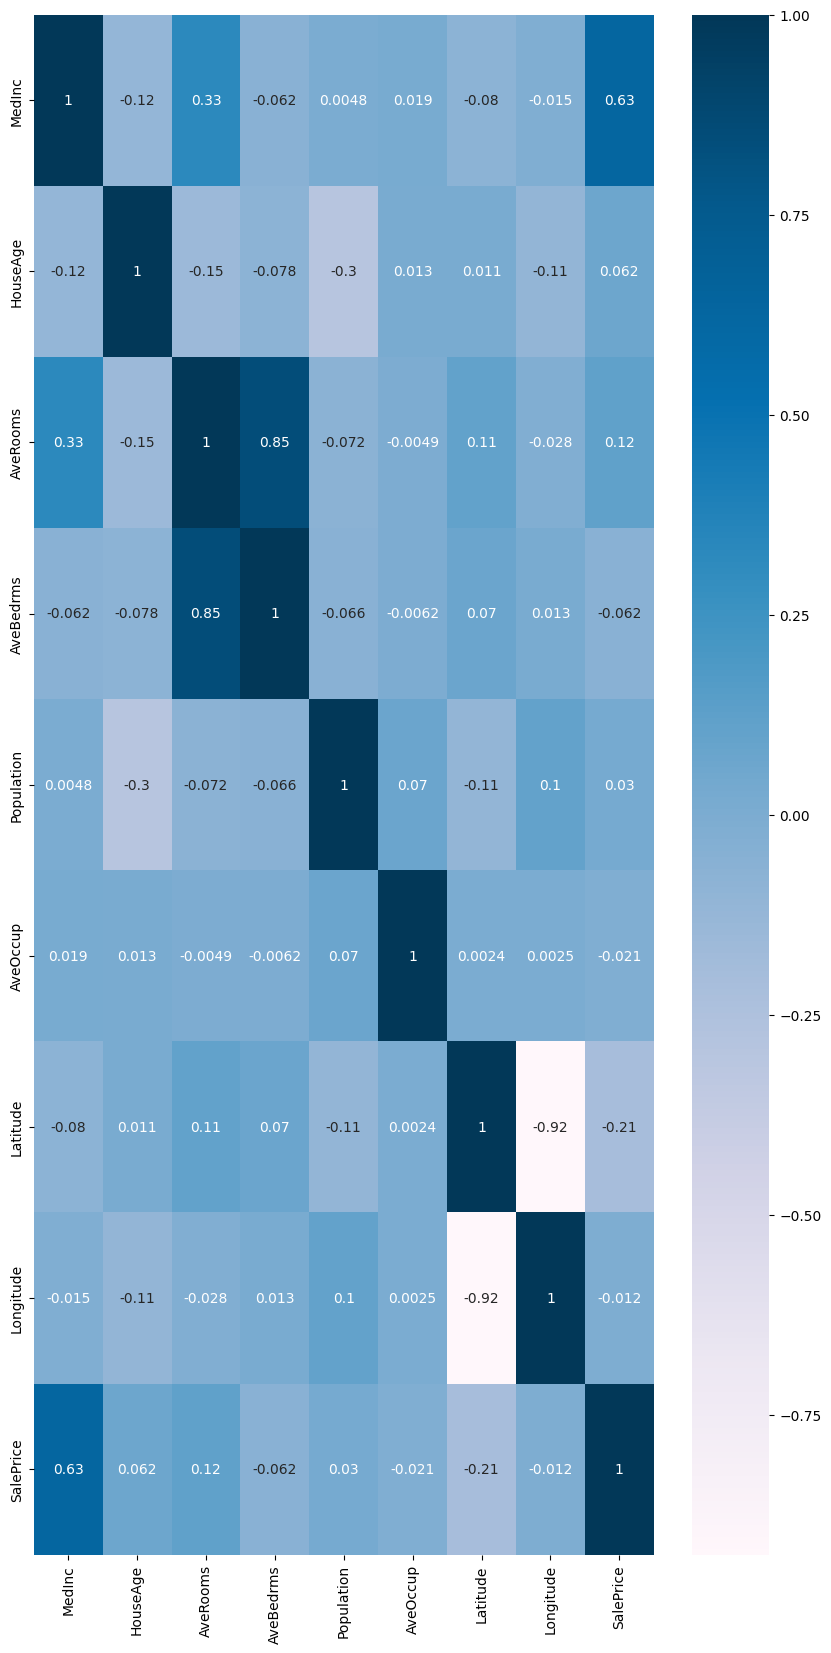

In [ ]:
# Set figure size for the heatmap
plt.figure(figsize=(10, 20))

# Calculate the correlation matrix of the data
cor = data.corr()

# Plot heatmap of correlations with annotations and 'PuBu' colormap
sns.heatmap(cor, annot=True, cmap='PuBu')

# Display the heatmap
plt.show()

In [ ]:
# Get correlation of all features with the target variable 'SalePrice'
cor_target = cor["SalePrice"]

# Select features with correlation greater than 0.1 (can adjust this threshold as needed)
relevant_features = cor_target[cor_target > 0.1]

# Extract feature names from the correlation series
names = [index for index, value in relevant_features.items()]

# Remove 'SalePrice' itself from the list of relevant features
if 'SalePrice' in names:
    names.remove('SalePrice')

# Print the selected features and their count
print("Selected features correlated with SalePrice (correlation > 0.1):")
print(names)
print("Number of relevant features:", len(names))

Selected features correlated with SalePrice (correlation > 0.1):
['MedInc', 'AveRooms']
Number of relevant features: 2


In [ ]:
# Import train_test_split function to split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Separate features (all columns except 'SalePrice') and target variable ('SalePrice')
x = data.drop("SalePrice", axis=1)  # Drop 'SalePrice' column from data to get features
y = data["SalePrice"]  # Target variable (what we want to predict)

# Split the data into training and testing sets
# test_size=0.2 means 20% data for testing and 80% for training
# random_state=42 ensures reproducibility of the split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 8)
(4128, 8)
(16512,)
(4128,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [133]:
predictions = lr.predict(x_test)

print("Actual Value of the house:- ", y_test[0])
print("Model Predicted Value:- ", predictions[0])

Actual Value of the house:-  0.3523500376995289
Model Predicted Value:-  0.25701329585550714


In [132]:
from sklearn.metrics import mean_squared_error, root_mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
print(mse)
print(rmse)

0.0005810160891949624
0.02410427533021813
